<a href="https://colab.research.google.com/github/aidonou/Red-neuronal-chona/blob/main/Red_neuronal_chona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerias usadas

In [6]:
!pip3 install keras-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from google.colab import files
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from PIL import Image
from keras_visualizer import visualizer
from IPython.display import display

Resto del codigo:

Seeds:

In [8]:
np.random.seed(1)
tf.random.set_seed(1)

Keras training:


In [9]:
mnist = keras.datasets.mnist.load_data(path='mnist.npz')
training_data = mnist[0]
test_data = mnist[1]

11490434/11490434 [==============================] - 0s 0us/step


Visualizar dataset:

Label:
7
Imagen:


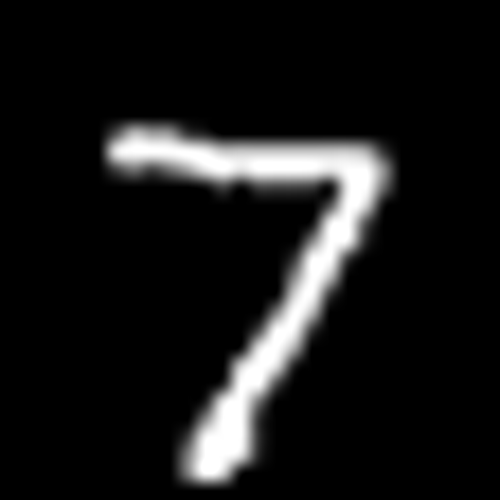

In [10]:
index = 0
print("Label:")
print(test_data[1][index])
print("Imagen:")
Image.fromarray((test_data[0][index]).astype(np.uint8)).resize((500,500))

Separar los datos:

In [11]:
def flatten_inputs(arr):
  result = []
  for x in arr:
    result.append(np.ravel(x))
  return np.array(result)

In [12]:
input: 3
output: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [13]:
training_outputs = keras.utils.to_categorical(training_data[1], 10)
test_outputs = keras.utils.to_categorical(test_data[1], 10)
training_inputs = np.expand_dims(flatten_inputs(training_data[0])/255, -1)
test_inputs = np.expand_dims(flatten_inputs(test_data[0])/255, -1)

Crear y compilar el modelo:

In [14]:
model = keras.models.Sequential()

model.add(keras.layers.Input(784))
model.add(keras.layers.Dense(128, activation=tf.nn.relu, name="Hidden_1"))
model.add(keras.layers.Dense(64, activation=tf.nn.relu, name="Hidden_2"))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax, name="Output"))

In [15]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy(),
             keras.metrics.FalseNegatives()]
)

Visualizar la activacion:

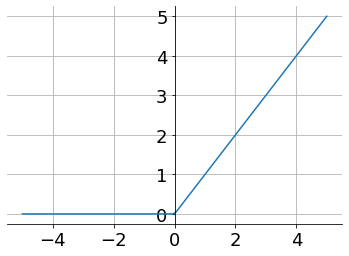

In [17]:
x = np.linspace(-5, 5, 100)
y = tf.nn.relu(x)

figure = plt.figure()
axis = figure.add_subplot(1, 1, 1)

axis.spines['left'].set_position('center')

axis.spines['right'].set_color('none')
axis.spines['top'].set_color('none')

plt.plot(x, y)
plt.locator_params(axis='y')
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid()

In [ ]:
x = np.linspace(-5, 5, 100)
y = tf.nn.softmax(x)

figure = plt.figure()
axis = figure.add_subplot(1, 1, 1)

axis.spines['left'].set_position('center')

axis.spines['right'].set_color('none')
axis.spines['top'].set_color('none')

plt.plot(x, y)
plt.locator_params(axis='y')
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid()

Red neuronal visualizada:

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_1 (Dense)            (None, 128)               100480    
                                                                 
 Hidden_2 (Dense)            (None, 64)                8256      
                                                                 
 Output (Dense)              (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


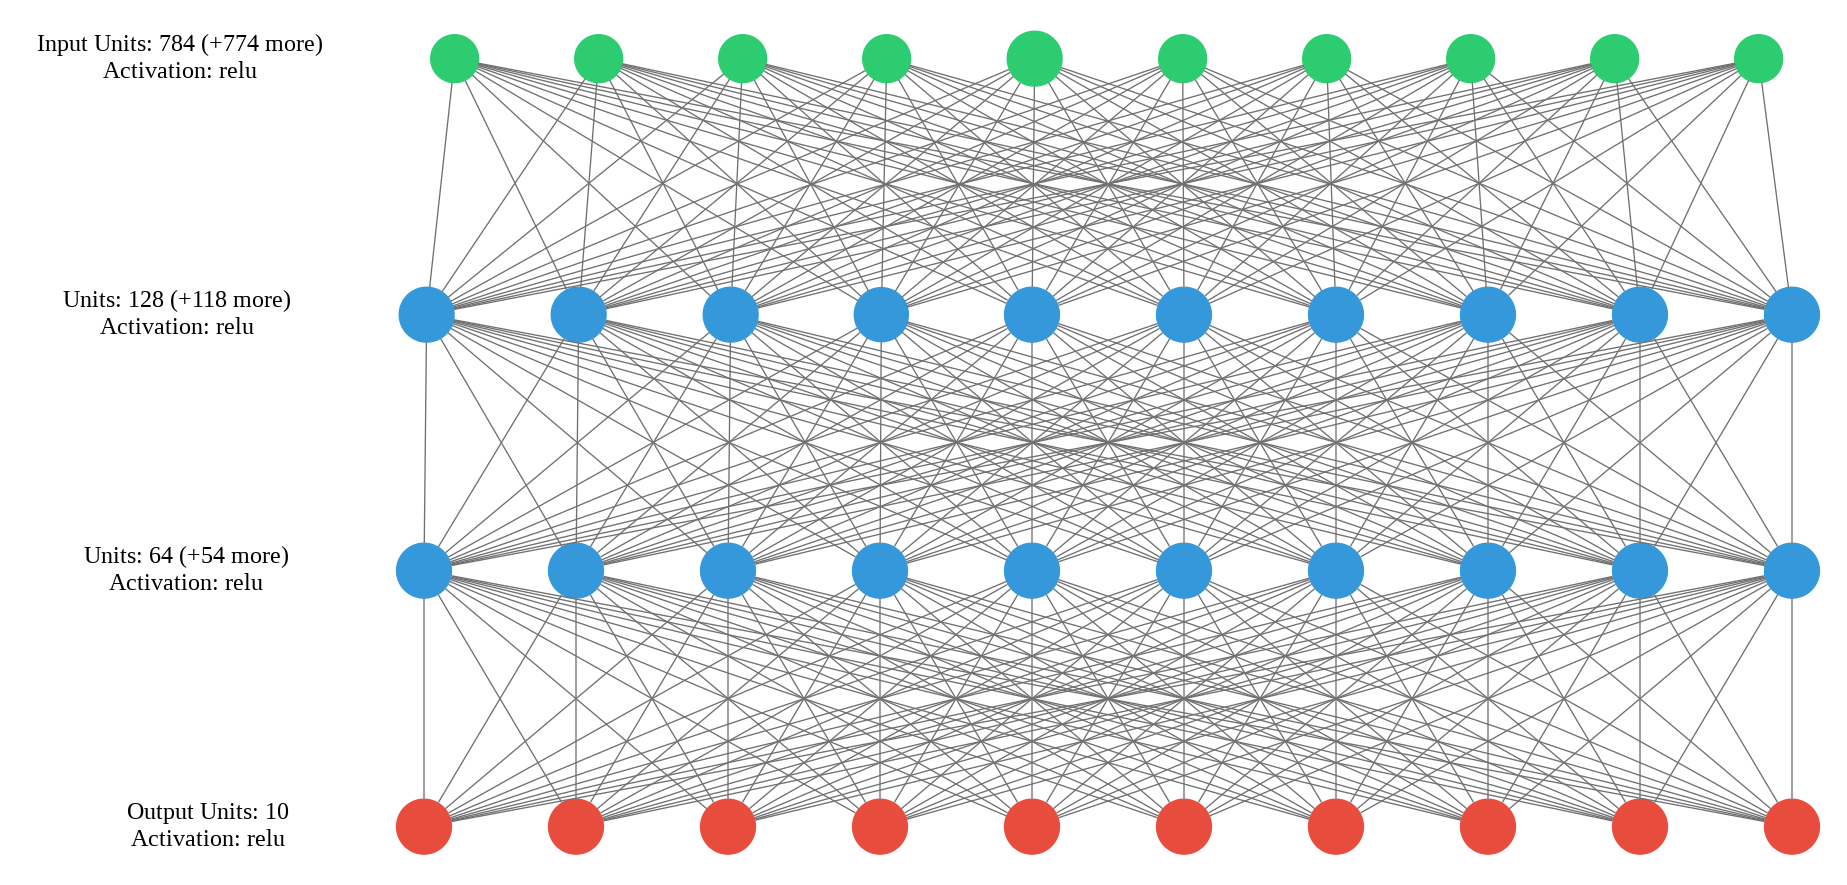

In [20]:
visualizer(model, filename="blue", format="png", view=True)
Image.open("blue.png")

entrenamiento de la IA:

In [21]:
model.fit(
    x=training_inputs,
    y=training_outputs,
    batch_size=5000,
    epochs=50,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    validation_data=(test_inputs, test_outputs),
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)

Epoch 1/50
12/12 [==============================] - 3s 112ms/step - loss: 0.2547 - binary_accuracy: 0.9065 - false_negatives: 56000.0000 - val_loss: 0.1682 - val_binary_accuracy: 0.9312 - val_false_negatives: 6778.0000
Epoch 2/50
12/12 [==============================] - 1s 79ms/step - loss: 0.1228 - binary_accuracy: 0.9556 - false_negatives: 24533.0000 - val_loss: 0.0815 - val_binary_accuracy: 0.9735 - val_false_negatives: 2110.0000
Epoch 3/50
12/12 [==============================] - 1s 80ms/step - loss: 0.0713 - binary_accuracy: 0.9766 - false_negatives: 10446.0000 - val_loss: 0.0577 - val_binary_accuracy: 0.9814 - val_false_negatives: 1269.0000
Epoch 4/50
12/12 [==============================] - 1s 75ms/step - loss: 0.0553 - binary_accuracy: 0.9819 - false_negatives: 7246.0000 - val_loss: 0.0489 - val_binary_accuracy: 0.9839 - val_false_negatives: 1034.0000
Epoch 5/50
12/12 [==============================] - 1s 76ms/step - loss: 0.0479 - binary_accuracy: 0.9844 - false_negatives: 610

Poner en funcionamiento la IA

Se sube una imagen y la ia lo predice:

In [23]:
uploaded = files.upload()

Saving 3.png to 3.png


Poner el nombre del archivo de la imagen:

In [27]:
# Nombre del archivo
nombre_im = "3.png"
# Poner True si tiene un fondo blanco
fondo_blanco = True

Se prepara la imagen para la IA:


In [25]:
# Convertir a grayscale
im = Image.open(nombre_im).convert('L')
# Cambiar el tamaño
im_resize = im.resize((28,28))
# Convertir a un array
im_arr = np.array(im_resize)

if(fondo_blanco):
  # Invertir el color de la imagen
  mask = np.full(im_arr.shape, 255)
  im_arr = mask - im_arr
  im_arr = im_arr.astype(np.uint8)
# Mostrar la imagen
print("Imagen que recibe la IA:")
Image.fromarray(im_arr)

Imagen que recibe la IA:


Prediccion:

In [28]:

prediction = model.predict(flatten_inputs(np.expand_dims(im_arr/255, axis=0)))
print("La IA piensa que el digito de la imagen es un:")
print(prediction.argmax())

# convertir el array a una lista de python
predictions = prediction.tolist()[0]
# convertir a un diccionario de pares
predictions_dict = {i : predictions[i] for i in range(len(predictions))}

print("Ranking (digito: confianza en porcentaje):")
# la funcion sorted los ordena por el valor
for x in sorted(predictions_dict.items(), key=lambda item: item[1], reverse=True):
  # Se muestra como numero: confianza en porcentaje
  print(str(x[0]) + ": " + str(x[1]*100) + "%")

1/1 [==============================] - 0s 105ms/step
La IA piensa que el digito de la imagen es un:
2
Ranking (digito: confianza en porcentaje):
2: 99.83853101730347%
3: 0.1614693203009665%
5: 2.5350542998126002e-06%
8: 3.3539812593907925e-08%
0: 8.85292896086185e-15%
6: 1.2717216392070147e-16%
7: 6.811606937657262e-17%
9: 1.9074458526384674e-20%
1: 1.545026744473106e-20%
4: 0.0%
